In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style = "whitegrid")

In [3]:
df = pd.read_csv("AIML Dataset.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [8]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.shape

(6362620, 11)

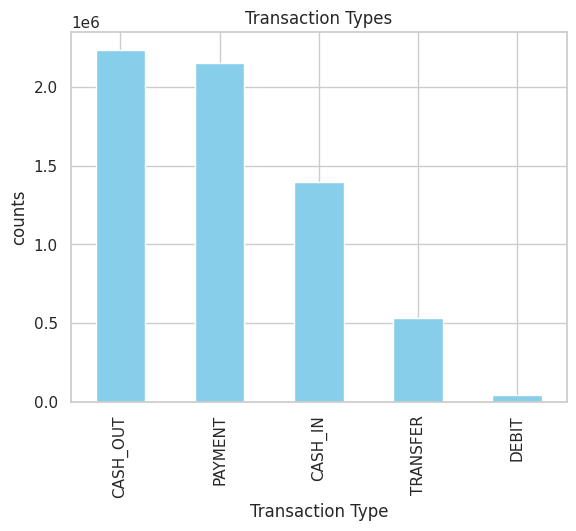

In [11]:
df['type'].value_counts().plot(kind = 'bar',title = 'Transaction Types', color = 'skyblue')
plt.xlabel("Transaction Type")
plt.ylabel("counts")
plt.show()

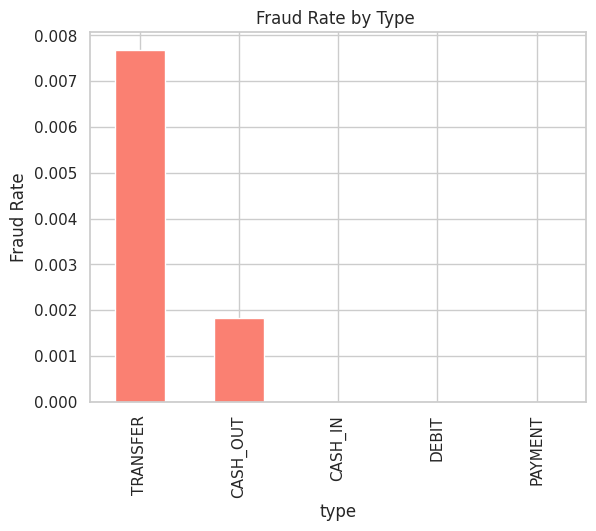

In [12]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending = False)
fraud_by_type.plot(kind= 'bar',title ="Fraud Rate by Type ",color = 'salmon')
plt.ylabel("Fraud Rate")
plt.show()

In [13]:
df['amount'].describe().astype(int)

,amount
count,6362620
mean,179861
std,603858
min,0
25%,13389
50%,74871
75%,208721
max,92445516


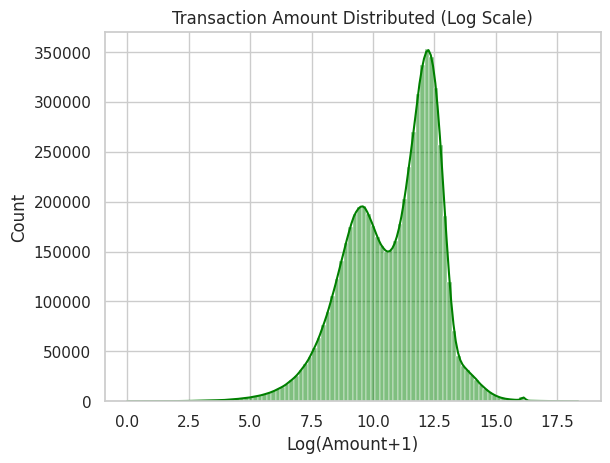

In [14]:
sns.histplot(np.log1p(df["amount"]),bins = 100 , kde = True , color = 'green')
plt.title("Transaction Amount Distributed (Log Scale)")
plt.xlabel("Log(Amount+1)")
plt.show()

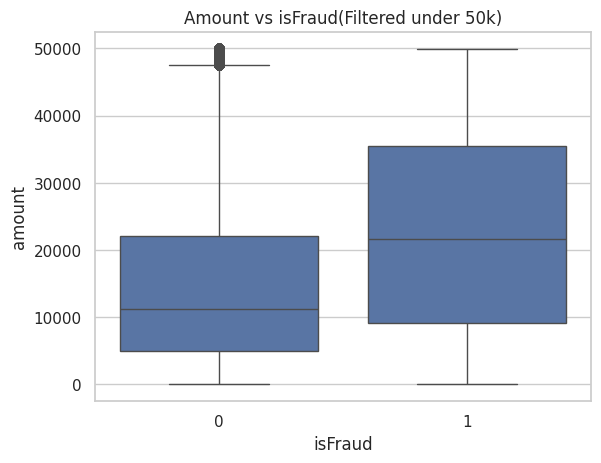

In [15]:
sns.boxplot(data = df[df["amount"]< 50000],x = 'isFraud',y= 'amount')
plt.title("Amount vs isFraud(Filtered under 50k)")
plt.show()

In [16]:
df["balanceDiffOrg"] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [17]:
(df["balanceDiffOrg"] < 0).sum()

np.int64(1399253)

In [18]:
(df["balanceDiffDest"] < 0).sum()

np.int64(1238864)

In [19]:
# Cell Name: Data Preprocessing - Categorical Encoding & Feature/Target Definition

print("\n--- Data Preprocessing: Categorical Encoding ---")

# Convert 'type' column using One-Hot Encoding.
# One-Hot Encoding transforms categorical features into a numerical format suitable for ML models.
# 'drop_first=True' is used to avoid multicollinearity by dropping the first category's dummy variable.
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)

print("DataFrame head after One-Hot Encoding 'type' column:")
print(df_encoded.head())
print(f"Shape after encoding: {df_encoded.shape}")


print("\n--- Data Preprocessing: Define Features (X) and Target (y) ---")

# Define the target variable for the classification task.
y = df_encoded['isFraud']

# Define features (X) by excluding the target and identifier/potentially leaking columns.
# 'isFraud' is the target variable.
# 'nameOrig' and 'nameDest' are unique identifiers, not predictive features.
# 'isFlaggedFraud' is a rule-based flag that strongly correlates with 'isFraud' and could lead to data leakage
# or make the model learn simple rules instead of complex patterns; thus, it's dropped.
X = df_encoded.drop(['isFraud', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

# 'step' is a time-step feature; for simplicity, it's used as a raw numerical feature here,
# though in advanced analysis, it could be engineered for periodicity or time-based trends.

print("Features (X) head:")
print(X.head())
print(f"Shape of Features (X): {X.shape}")
print(f"Shape of Target (y): {y.shape}")

# Verify that all features in X are now numerical data types, which is required by most ML models.
print("\nNon-numeric columns in X (after encoding and drops):", X.select_dtypes(include='object').columns.tolist())


--- Data Preprocessing: Categorical Encoding ---
DataFrame head after One-Hot Encoding 'type' column:
   step    amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0     1   9839.64  C1231006815       170136.0       160296.36  M1979787155   
1     1   1864.28  C1666544295        21249.0        19384.72  M2044282225   
2     1    181.00  C1305486145          181.0            0.00   C553264065   
3     1    181.00   C840083671          181.0            0.00    C38997010   
4     1  11668.14  C2048537720        41554.0        29885.86  M1230701703   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  balanceDiffOrg  \
0             0.0             0.0        0               0         9839.64   
1             0.0             0.0        0               0         1864.28   
2             0.0             0.0        1               0          181.00   
3         21182.0             0.0        1               0          181.00   
4             0.0             0.0     

In [20]:
# Cell Name: Data Preprocessing - Addressing Class Imbalance & Train-Test Split

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler # For handling imbalance
from collections import Counter # To check class distribution

print("\n--- Data Preprocessing: Addressing Class Imbalance ---")

print("Original class distribution (y):\n", y.value_counts())
print("Original class distribution percentage:\n", y.value_counts(normalize=True) * 100)

# Check the ratio
fraud_count = y.value_counts()[1]
non_fraud_count = y.value_counts()[0]
ratio = non_fraud_count / fraud_count
print(f"Ratio of Non-Fraud to Fraud: {ratio:.2f}:1")

# Use RandomUnderSampler to balance the dataset
# We'll undersample the majority class (0) to match the minority class (1).
# This is a simple approach. For larger datasets, more advanced techniques might be considered.
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print("\nClass distribution after RandomUnderSampler (y_resampled):\n", y_resampled.value_counts())
print(f"Shape of X_resampled: {X_resampled.shape}")
print(f"Shape of y_resampled: {y_resampled.shape}")

# --- Data Preprocessing: Train-Test Split (after resampling) ---
# It's crucial to split AFTER resampling if you used methods that learn from the data
# like SMOTE, but for simple RandomUnderSampler, it can be done either way.
# Splitting after resampling ensures your train and test sets are balanced.

print("\n--- Data Preprocessing: Train-Test Split ---")

# Use stratify=y_resampled to ensure an even split of classes in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print(f"\nTraining features (X_train) shape: {X_train.shape}")
print(f"Testing features (X_test) shape: {X_test.shape}")
print(f"Training target (y_train) shape:\n{y_train.value_counts()}")
print(f"Testing target (y_test) shape:\n{y_test.value_counts()}")

# Note: After this step, X_train, y_train, X_test, y_test are ready for scaling.


--- Data Preprocessing: Addressing Class Imbalance ---
Original class distribution (y):
 isFraud
0    6354407
1       8213
Name: count, dtype: int64
Original class distribution percentage:
 isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64
Ratio of Non-Fraud to Fraud: 773.70:1

Class distribution after RandomUnderSampler (y_resampled):
 isFraud
0    8213
1    8213
Name: count, dtype: int64
Shape of X_resampled: (16426, 12)
Shape of y_resampled: (16426,)

--- Data Preprocessing: Train-Test Split ---

Training features (X_train) shape: (13140, 12)
Testing features (X_test) shape: (3286, 12)
Training target (y_train) shape:
isFraud
0    6570
1    6570
Name: count, dtype: int64
Testing target (y_test) shape:
isFraud
1    1643
0    1643
Name: count, dtype: int64


In [21]:
# Cell Name: Data Preprocessing - Feature Scaling

from sklearn.preprocessing import StandardScaler

print("\n--- Data Preprocessing: Feature Scaling ---")

# Initialize the StandardScaler.
scaler = StandardScaler()

# Fit the scaler ONLY on the training data and transform both train and test sets.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to retain column names.
# This is crucial for model interpretability (e.g., SHAP plots) later,
# as SHAP needs feature names.
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(f"X_train_scaled_df shape: {X_train_scaled_df.shape}")
print(f"X_test_scaled_df shape: {X_test_scaled_df.shape}")
print("Features scaled (mean=0, std=1).")
print("First 3 rows of scaled training features:\n", X_train_scaled_df.head(3))


--- Data Preprocessing: Feature Scaling ---
X_train_scaled_df shape: (13140, 12)
X_test_scaled_df shape: (3286, 12)
Features scaled (mean=0, std=1).
First 3 rows of scaled training features:
        step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0  0.872266 -0.412373      -0.365680       -0.210461       -0.244673   
1  0.345336 -0.266778      -0.338097       -0.210757       -0.244673   
2  1.719487  0.483406       0.152911       -0.210757       -0.244673   

   newbalanceDest  balanceDiffOrg  balanceDiffDest  type_CASH_OUT  type_DEBIT  \
0       -0.318087       -0.356159        -0.258423       1.145495   -0.054561   
1       -0.246832       -0.307681        -0.072442       1.145495   -0.054561   
2       -0.333264        0.548247        -0.298035      -0.872985   -0.054561   

   type_PAYMENT  type_TRANSFER  
0      -0.44427      -0.639149  
1      -0.44427      -0.639149  
2      -0.44427       1.564581  



--- Model Training: LightGBM Classifier with GridSearchCV ---

Starting GridSearchCV search for LightGBM Classifier (this may take a while)...
Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[LightGBM] [Info] Number of positive: 6570, number of negative: 6570
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2052
[LightGBM] [Info] Number of data points in the train set: 13140, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
GridSearchCV search for LightGBM Classifier complete.

Best LightGBM Classifier model from GridSearchCV retrieved.

Best parameters found for LightGBM Classifier: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 15, 'reg_alpha': 0, 'reg_lambda': 0}
Best ROC AUC fro

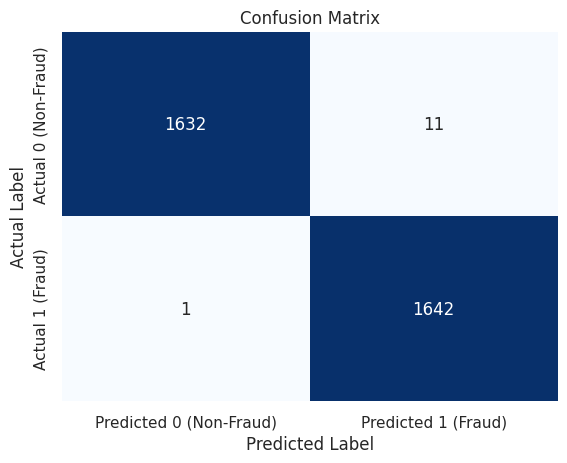

In [22]:
# Cell Name: Model Training - LightGBM Classifier with GridSearchCV

import lightgbm as lgbm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Model Training: LightGBM Classifier with GridSearchCV ---")

# Define the parameter grid for LightGBM Classifier.
# This grid is an example; it can be expanded or refined for further optimization.
param_grid_lgbm_clf = {
    'n_estimators': [100, 200, 300],            # Number of boosting rounds (trees)
    'learning_rate': [0.05, 0.1, 0.2],          # Step size shrinkage
    'num_leaves': [15, 31, 63],                 # Max number of leaves in one tree (primary complexity control for LightGBM)
    'max_depth': [-1, 5, 10],                   # Max tree depth (-1 means no limit; acts as a hard constraint)
    'reg_alpha': [0, 0.1, 0.5],                 # L1 regularization term
    'reg_lambda': [0, 0.1, 0.5]                 # L2 regularization term
}

# Initialize the base LightGBM Classifier estimator for GridSearchCV.
lgbm_base_clf = lgbm.LGBMClassifier(
    objective='binary',          # Objective for binary classification (predicts probabilities)
    metric='auc',                # Evaluation metric used for internal validation/monitoring during GridSearchCV (Area Under Curve)
    random_state=42,             # Ensures reproducibility of results
    n_jobs=-1                    # Uses all available CPU cores for parallel processing
)

# Initialize GridSearchCV for hyperparameter tuning.
# 'roc_auc' is chosen as the scoring metric because it is robust for imbalanced classification.
# 'cv' specifies 3-fold cross-validation, ensuring robust evaluation of each parameter combination.
grid_search_lgbm_clf = GridSearchCV(
    estimator=lgbm_base_clf,
    param_grid=param_grid_lgbm_clf,
    scoring='roc_auc',
    cv=3,
    verbose=2, # Verbosity level (2 for more detailed progress messages)
    n_jobs=-1
)

print("\nStarting GridSearchCV search for LightGBM Classifier (this may take a while)...")
# Fit GridSearchCV to the scaled and balanced training data.
grid_search_lgbm_clf.fit(X_train_scaled_df, y_train)
print("GridSearchCV search for LightGBM Classifier complete.")

# Retrieve the best model and its performance from the Grid Search.
best_lgbm_clf = grid_search_lgbm_clf.best_estimator_
print("\nBest LightGBM Classifier model from GridSearchCV retrieved.")

print(f"\nBest parameters found for LightGBM Classifier: {grid_search_lgbm_clf.best_params_}")
print(f"Best ROC AUC from cross-validation: {grid_search_lgbm_clf.best_score_:.4f}")


# Make predictions with the best model on the unseen test set.
y_pred_lgbm = best_lgbm_clf.predict(X_test_scaled_df)
y_pred_proba_lgbm = best_lgbm_clf.predict_proba(X_test_scaled_df)[:, 1] # Get probabilities for the positive class (fraud)

print("\nPredictions generated on the test set using the best model.")

# Evaluate the Best Model's performance using classification metrics.
print("\n--- Model Evaluation (Best LightGBM Classifier) ---")

accuracy = accuracy_score(y_test, y_pred_lgbm)
precision = precision_score(y_test, y_pred_lgbm)
recall = recall_score(y_test, y_pred_lgbm)
f1 = f1_score(y_test, y_pred_lgbm)
roc_auc = roc_auc_score(y_test, y_pred_proba_lgbm)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

print("\nClassification Report:")
# The classification report provides precision, recall, f1-score, and support for each class.
print(classification_report(y_test, y_pred_lgbm))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0 (Non-Fraud)', 'Predicted 1 (Fraud)'],
            yticklabels=['Actual 0 (Non-Fraud)', 'Actual 1 (Fraud)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [23]:
# Cell Name: Model Interpretability (XAI - SHAP Values)

import shap # Import the SHAP library for explainable AI
import matplotlib.pyplot as plt # For plotting visualizations
import numpy as np # For numerical operations, especially with array indexing

print("\n--- Model Interpretability: SHAP Values ---")

# Step 1: Initialize the SHAP explainer for tree-based models.
# shap.TreeExplainer is optimized for models like LightGBM and XGBoost.
explainer = shap.TreeExplainer(best_lgbm_clf)

print("SHAP TreeExplainer initialized.")

# Step 2: Calculate SHAP values for the test data.
# These values represent each feature's contribution to the model's output for each prediction.
# For binary classification, explainer.shap_values() typically returns a list of two arrays:
# [0] for SHAP values related to class 0 (non-fraud)
# [1] for SHAP values related to class 1 (fraud)
try:
    shap_values_raw = explainer.shap_values(X_test_scaled_df)

    # Determine which SHAP values array to use for plotting (for the positive class, i.e., fraud=1)
    if isinstance(shap_values_raw, list) and len(shap_values_raw) == 2:
        shap_values_for_plot = shap_values_raw[1] # Select SHAP values for the positive class (fraud)
    else:
        # Fallback if shap_values_raw is not a list of two arrays (e.g., direct array output)
        shap_values_for_plot = shap_values_raw

    # Defensive check: Ensure the SHAP values array is 2D (n_samples x n_features)
    # This addresses previous AssertionErrors where it was sometimes interpreted as 1D.
    if len(shap_values_for_plot.shape) == 1 and shap_values_for_plot.shape[0] == X_test_scaled_df.shape[1]:
        # This condition suggests explainer returned global feature importance, not per-instance values.
        # This is a fallback to try getting per-instance values more explicitly.
        shap_values_for_plot = explainer.shap_values(X_test_scaled_df.values)[1]


except Exception as e:
    # This block catches any unexpected errors during SHAP value calculation
    print(f"Error during initial SHAP value calculation or interpretation: {e}")
    print("Trying a fallback method for SHAP values (passing NumPy array directly)...")
    try:
        shap_values_raw = explainer.shap_values(X_test_scaled_df.values) # Pass numpy array explicitly
        if isinstance(shap_values_raw, list) and len(shap_values_raw) == 2:
            shap_values_for_plot = shap_values_raw[1]
        else:
            shap_values_for_plot = shap_values_raw
        if len(shap_values_for_plot.shape) == 1: # Final defensive reshape
            shap_values_for_plot = shap_values_for_plot.reshape(-1, X_test_scaled_df.shape[1])
            print("Warning: Reshaped shap_values_for_plot to 2D in fallback.")
    except Exception as e_fallback:
        print(f"Fallback SHAP calculation failed: {e_fallback}")
        # If all else fails, raise an error as SHAP plotting won't work correctly
        raise ValueError("Failed to calculate SHAP values in correct shape. Check SHAP/LightGBM versions.")


print(f"Shape of SHAP values for plotting: {shap_values_for_plot.shape}")
print(f"Shape of X_test_scaled_df: {X_test_scaled_df.shape}")

# Critical check: Ensure the number of rows in SHAP values matches the number of samples in the test set.
# This prevents AssertionError during plotting.
if shap_values_for_plot.shape[0] != X_test_scaled_df.shape[0]:
    print("\nCRITICAL ERROR: Number of rows in SHAP values does not match X_test_scaled_df!")
    print("This indicates a deeper issue, possibly with SHAP library version or data consistency.")
    print("Please ensure your 'shap' library is up-to-date: !pip install")


--- Model Interpretability: SHAP Values ---
SHAP TreeExplainer initialized.
Shape of SHAP values for plotting: (3286, 12)
Shape of X_test_scaled_df: (3286, 12)


In [25]:
# Cell Name: 8. Save Model and Scaler

import joblib # Library for saving and loading Python objects

print("\n--- Saving Model and Scaler ---")

# Define file paths to save
model_path = 'best_lgbm_clf_model.joblib'
scaler_path = 'scaler.joblib'

# Save the best trained LightGBM model
joblib.dump(best_lgbm_clf, model_path)
print(f"Best LightGBM Classifier model saved to {model_path}")

# Save the fitted StandardScaler
joblib.dump(scaler, scaler_path)
print(f"StandardScaler saved to {scaler_path}")

print("Model and Scaler saving complete. These files will be used by the Streamlit app.")


--- Saving Model and Scaler ---
Best LightGBM Classifier model saved to best_lgbm_clf_model.joblib
StandardScaler saved to scaler.joblib
Model and Scaler saving complete. These files will be used by the Streamlit app.


In [26]:
!pip freeze > requirements.txt